# <span style = "color:#156a73"  > End to End complete ML toy Project on a Dataset </span>

## <span style = "color:#b3b258" >Importing Libraries</span>

In [117]:
import pandas as pd
import numpy as np

In [118]:
df = pd.read_csv("../data/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## <span style = "color:#b3b258" >Importing Libraries</span>

0. Preprocessing + Eda + Feature Selection
1. Extract input and output cols. X, y
2. Scale the value. eg. standard or minmax
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

## <span style = "color:#b3b258" >Understanding and prepricess the dataset</span>

In [119]:
df.shape

(100, 4)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [121]:
df.duplicated().sum()

0

In [122]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

> There are 4 columns and 100 rows in the dataset. 

- The first column is not important.
- The 2nd and 3rd columns can be used as input columns
- The 3rd column is target variable or the output coloumns

> There are no null and duplicated values in the dataset. 

> The data types are already float and int. NO object or string. We dont have to encode anything.

>



### <span style = "color:red" >Removing first coloumn from dataset</span>

In [123]:
df = df.iloc[ : , 1 : ]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


The other methods can be used to remove a coloumn from the dataset

```python

df = df.drop(columns=["Unnamed: 0"], axis=1)
df = df[["cgpa", "iq", "placement"]]

```

## <span style = "color:#b3b258" >EDA</span>

In [124]:
import matplotlib.pyplot as plt

Checking relationship between input coloumns

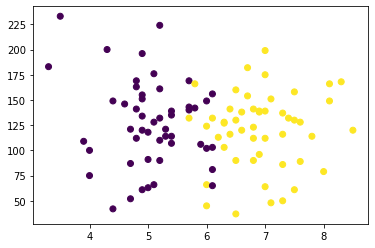

In [125]:
plt.scatter(x = df["cgpa"], y=df["iq"], c=df["placement"])

> After checking the relationship, we observed that there is a linear behaviour in the dataset. As both the colours can be distinguished by a linear line

> We will use logistic regression that classify the data. It classify data into two categories.

## <span style = "color:#b3b258" >Extracting input and output cols</span>

In [126]:
X = df[["cgpa", "iq"]]
y = df["placement"]

y can also be written as
```python
y = [:,-1] # last coloumn
```

## <span style = "color:#b3b258" >Train test split</span>

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [128]:
X_train

,cgpa,iq
80,4.9,196.0
4,5.8,142.0
81,5.4,107.0
76,4.9,155.0
85,5.8,166.0
...,...,...
87,5.7,132.0
1,5.9,106.0
69,8.5,120.0
55,7.8,114.0


## <span style = "color:#b3b258" >Scalling the values</span>

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [130]:
X_train_scaled

array([[-0.91421739,  1.99462894],
       [-0.13153425,  0.55825671],
       [-0.47939342, -0.3727253 ],
       [-0.91421739,  0.90405002],
       [-0.13153425,  1.19664437],
       [ 0.82507848,  0.47845825],
       [ 0.99900806, -1.94209496],
       [ 0.30328972,  0.15926442],
       [ 0.12936013,  0.29226185],
       [-0.65332301,  0.29226185],
       [ 1.86865599,  1.19664437],
       [ 0.04239534, -0.50572272],
       [ 0.04239534,  0.07946596],
       [-1.00118218,  1.27644283],
       [ 1.17293765,  0.42525928],
       [ 0.12936013, -1.06431193],
       [-1.69690053, -0.5589217 ],
       [-1.34904136,  0.74445311],
       [-0.8272526 , -1.54310267],
       [-1.17511177,  0.66465465],
       [-0.21849904,  0.58485619],
       [ 1.17293765, -1.88889599],
       [ 0.82507848,  0.45185877],
       [-1.00118218, -0.23972787],
       [-0.91421739, -0.02693198],
       [-1.08814698, -1.83569702],
       [-1.08814698, -0.90471501],
       [-0.47939342,  0.47845825],
       [-0.65332301,

In [131]:
X_test_scaled

array([[ 0.41899005, -0.30132718],
       [-0.13966335, -1.93306282],
       [-1.62940577, -1.99833225],
       [-0.88453456,  1.96134624],
       [ 0.13966335, -0.12727538],
       [-1.35007906, -0.27957071],
       [ 2.00184137,  0.74298363],
       [ 0.51209896,  1.04757428],
       [-0.69831676, -0.43186603],
       [-0.88453456,  0.5906883 ],
       [ 0.60520786,  0.1555588 ],
       [-0.79142566, -0.27957071],
       [-1.72251467,  1.43919083],
       [ 0.79142566,  1.41743436],
       [ 0.23277225, -0.38835308],
       [ 1.81562357,  0.3296106 ],
       [-0.04655445, -0.67118726],
       [ 0.79142566, -0.47537898],
       [ 0.60520786, -0.95402144],
       [ 0.23277225,  0.1555588 ]])

## <span style = "color:#b3b258" >Training and testing the model</span>

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [133]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [134]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [135]:
y_prediction = model.predict(X_test_scaled)

## <span style = "color:#b3b258" >Evaluating the model</span>

### <span style = "color:red" >checking accuracy score</span>

In [136]:
from sklearn.metrics import accuracy_score
av = accuracy_score(y_test, y_prediction)

### <span style = "color:red" >Checking the error</span>

In [137]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_prediction)

0.05

**Decision boundry:** __The pattern found by the model in the data__

In [138]:
type(y_train)

pandas.core.series.Series

### <span style = "color:red" >How to plot the decision boundry.</span>

<AxesSubplot:>

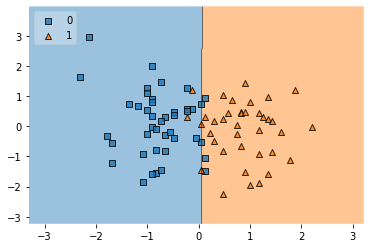

In [139]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_scaled, np.array(y_train), clf=model, legend=2) # y_train.values

These two are used to convert y_train from df.series to into np.array

```python

y_train.values
np.array(y_train)

```

In [140]:
import pickle


In [141]:
pickle.dump(model, open("model.pkl", "wb"))